Лабораторная работа № 4 (предварительный анализ данных)

Задание 1: Детекция аномалий в данных кредитного скоринга

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

data_1 = pd.read_csv('creditcard.csv')
# Z-score
z_scores = stats.zscore(data_1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
                                'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 
                                'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 
                                'V23', 'V24', 'V25', 'V26', 'V27', 'V28']])
abs_z_scores = abs(z_scores)
threshold = 3
anomalies_z = (abs_z_scores > threshold).any(axis=1)
data_1['Anomaly_Z'] = anomalies_z

print(data_1[data_1['Anomaly_Z']])
#print(len(data_1[data_1['Anomaly_Z']]))

         Time        V1        V2        V3        V4        V5        V6  \
7           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
18         14 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
51         36 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
82         52 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575   
83         53 -1.198968 -1.474100  1.840326 -4.515824  0.327567 -0.174469   
...       ...       ...       ...       ...       ...       ...       ...   
122817  76697 -7.365748  7.473345 -5.695923 -0.396500 -0.138418 -0.039520   
122831  76703 -1.595079  1.163967 -0.022632 -0.962087  1.166687  5.078284   
122833  76703 -0.569571 -0.100491  0.253803 -0.426615  0.986629  4.674808   
122843  76708  1.164375 -0.373099 -0.686777  0.329650  1.745575  4.052066   
122878  76722 -4.407079  3.412674  0.262904 -2.292505 -0.076449 -0.721205   

              V7        V8        V9  ...       V22       V23       V24  \


In [25]:
# IQR
data_1 = pd.read_csv('creditcard.csv')
df_cleaned = data_1.drop(columns=['Time', 'Amount', 'Class'])

Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

anomalies_iqr = ((df_cleaned < (Q1 - threshold * IQR)) | (df_cleaned > (Q3 + threshold * IQR)))
anomalies_count_iqr = anomalies_iqr.any(axis=1)

data_1['Anomaly_IQR'] = anomalies_count_iqr
print(data_1[data_1['Anomaly_IQR']])

         Time        V1        V2        V3        V4        V5        V6  \
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
7           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8           7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
...       ...       ...       ...       ...       ...       ...       ...   
122867  76716 -1.907834  1.652907  0.021261 -0.681118 -0.431423 -0.586191   
122869  76717 -0.350796  1.168985  1.283090  1.692157  0.754830  0.195970   
122870  76717 -1.310969  0.768406  1.199257 -1.078661 -0.374184 -1.170624   
122877  76721 -0.156787  0.167566  1.872078 -0.750101 -0.269882  0.228433   
122878  76722 -4.407079  3.412674  0.262904 -2.292505 -0.076449 -0.721205   

              V7        V8        V9  ...       V22       V23       V24  \


Задание 2: Поиск аномалий в данных кредитного скоринга

Решение аналогичное предыдущему заданию.

Задание 3: Обнаружение аномалий в данных о температуре

In [26]:
data_3 = pd.read_csv('Summary of Weather.csv')
numeric_cols = ['MinTemp', 'MaxTemp', 'MeanTemp']
data_3 = data_3.dropna(subset=numeric_cols)

# print(data_3[numeric_cols].dtypes)

# Z-score
z_scores = np.abs(stats.zscore(data_3[numeric_cols]))

threshold = 3

anomalies_z = data_3[(z_scores > threshold).any(axis=1)]

print(f"Обнаружено {len(anomalies_z)} аномальных записей по Z-score.")

Обнаружено 2776 потенциальных аномальных записей по Z-score.


/tmp/ipykernel_142/4107925103.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3 = pd.read_csv('Summary of Weather.csv')


Задание 4: Прогнозирование пропущенных значений в данных о болезни диабета.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

data_4 = pd.read_csv('diabetes.csv')

print(data_4.isnull().sum())

cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_missing:
    data_4[col] = data_4[col].replace(0, np.nan)

print(data_4.isnull().sum())

imputer = KNNImputer(n_neighbors=5)

data_imputed = pd.DataFrame(imputer.fit_transform(data_4), columns=data_4.columns)

X = data_imputed.drop('Outcome', axis=1) # целевая переменная
y = data_imputed['Outcome'] # признаки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
#print(y_pred)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Mean Squared Error: 0.1651525519910768


Задание 5: Обработка пропущенных значений

In [7]:
import seaborn as sns

data_5 = sns.load_dataset('titanic')

print(data_5.isnull().sum())

titanic_mean = data_5.copy()
for column in titanic_mean.select_dtypes(include='number').columns:
    titanic_mean[column] = titanic_mean[column].fillna(titanic_mean[column].mean())

print("После заполнения средним значением:")
print(titanic_mean.isnull().sum(),"\n")

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
После заполнения средним значением:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 



Задание 6: Нормализация и стандартизация признаков датасета "Red Wine Quality"

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

data_6 = pd.read_csv("winequality-red.csv")

X = data_6.drop('quality', axis=1)

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)

X_standard_df = pd.DataFrame(X_standard, columns=X.columns)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)
X_robust_df = pd.DataFrame(X_robust, columns=X.columns)

print("Оригинальные данные:")
print(X)

print("\nStandardScaler:")
print(X_standard_df)

print("\nMinMaxScaler:")
print(X_minmax_df)

print("\nRobustScaler:")
print(X_robust_df)

Оригинальные данные:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      

Задание 7: Применение описательной статистики и корреляционного анализа для датасета "House Prices"

Основные метрики описательной статистики:
                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130

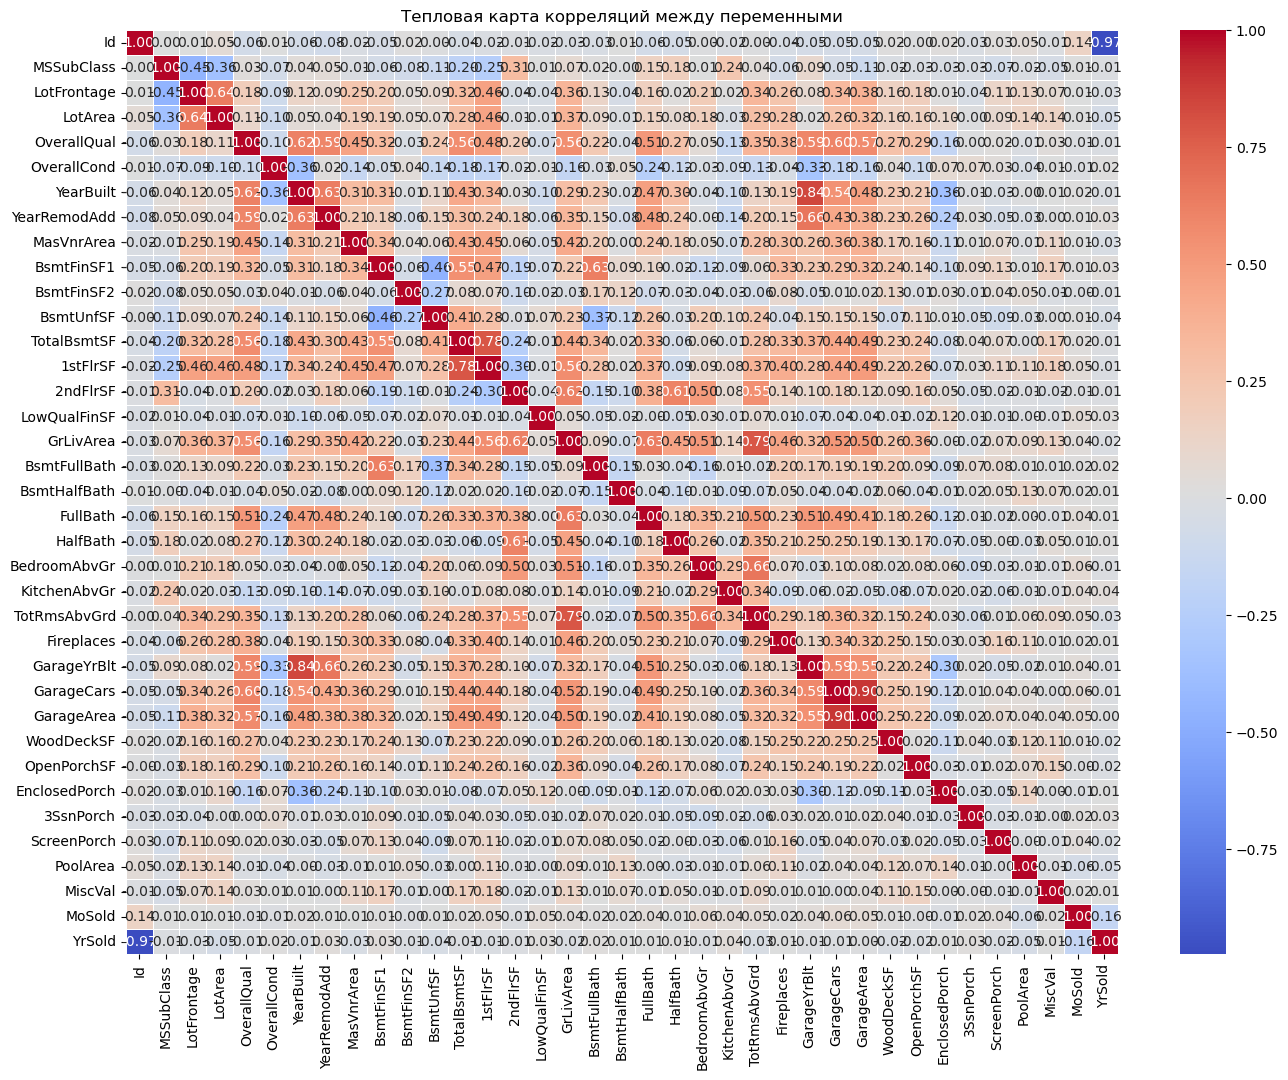

In [14]:
import matplotlib.pyplot as plt

data_7 = pd.read_csv("test.csv")

numeric_data = data_7.select_dtypes(include=[float, int])

descriptive_stats = numeric_data.describe()
print("Основные метрики описательной статистики:")
print(descriptive_stats)

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляций между переменными')
plt.show()

Задание 8: Обработка текстовых данных в датасете "Twitter Airline Sentiment"